In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Wine\Wine_AL_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	0
float64		column 2	0
float64		column 3	0
float64		column 4	0
int64		column 5	0
float64		column 6	4
float64		column 7	1
float64		column 8	1
float64		column 9	2
float64		column 10	1
float64		column 11	1
float64		column 12	5
int64		column 13	0


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,178.000000,178.000000,178.000000,178.000000,178.000000,174.000000,177.000000,177.000000,176.000000,177.000000,177.000000,173.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.287644,2.029435,0.362938,1.589545,5.059548,0.955910,2.603295,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.624730,1.001690,0.123961,0.571003,2.324781,0.228292,0.714198,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.200000,0.270000,1.250000,3.210000,0.780000,1.920000,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.335000,2.140000,0.340000,1.555000,4.680000,0.960000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.880000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


<AxesSubplot:>

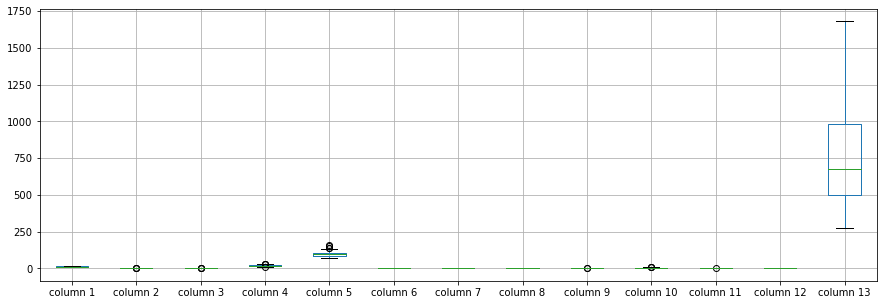

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      13.000618
column 2       2.336348
column 3       2.366517
column 4      19.494944
column 5      99.741573
column 6       2.287644
column 7       2.029435
column 8       0.362938
column 9       1.589545
column 10      5.059548
column 11      0.955910
column 12      2.603295
column 13    746.893258
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,0.094397,0.211545,-0.310235,0.270798,0.291333,0.237093,-0.173421,0.126996,0.547044,-0.061282,0.075581,0.643720
column 2,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.333638,-0.412461,0.292321,-0.223407,0.248855,-0.561064,-0.364258,-0.192011
column 3,0.211545,0.164045,1.000000,0.443367,0.286587,0.111660,0.115680,0.184772,-0.008835,0.260112,-0.064385,0.004738,0.223626
column 4,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.332485,-0.351366,0.360648,-0.206304,0.018143,-0.268787,-0.280186,-0.440597
column 5,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.218912,0.196831,-0.259128,0.230864,0.199785,0.056935,0.079762,0.393351
column 6,0.291333,-0.333638,0.111660,-0.332485,0.218912,1.000000,0.865599,-0.445566,0.615869,-0.055398,0.439259,0.704629,0.499406
column 7,0.237093,-0.412461,0.115680,-0.351366,0.196831,0.865599,1.000000,-0.540603,0.650965,-0.172252,0.550090,0.791989,0.494865
column 8,-0.173421,0.292321,0.184772,0.360648,-0.259128,-0.445566,-0.540603,1.000000,-0.375720,0.133254,-0.257004,-0.502019,-0.326276
column 9,0.126996,-0.223407,-0.008835,-0.206304,0.230864,0.615869,0.650965,-0.375720,1.000000,-0.028693,0.302201,0.534164,0.318693
column 10,0.547044,0.248855,0.260112,0.018143,0.199785,-0.055398,-0.172252,0.133254,-0.028693,1.000000,-0.520837,-0.432021,0.318851


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+43,13+43+43,13+43+43,13+43+43+43+43,13+43+43+43+43+43,13+43+43+43+43+43+43,13+43+43+43+43+43,13+43+43+43+43,13+43+43+43,13+43+43,13+43,13], vae_layer = False, seed = 430)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 954.2386696555398
Epoch: 1 , loss: 960.0307783647017
Epoch: 2 , loss: 959.7066151012074
Epoch: 3 , loss: 961.0189541903409
Epoch: 4 , loss: 963.8742120916194
Epoch: 5 , loss: 962.8760930841619
Epoch: 6 , loss: 959.8937322443181
Epoch: 7 , loss: 953.5149591619319
Epoch: 8 , loss: 958.3128939541904
Epoch: 9 , loss: 955.980146928267
Epoch: 10 , loss: 964.2281660600142
Epoch: 11 , loss: 957.5663230202415
Epoch: 12 , loss: 962.2795243696733
Epoch: 13 , loss: 955.4837812943892
Epoch: 14 , loss: 964.9177967418324
Epoch: 15 , loss: 964.4006680575284
Epoch: 16 , loss: 966.2961592240767
Epoch: 17 , loss: 963.810136274858
Epoch: 18 , loss: 958.351396040483
Epoch: 19 , loss: 959.2932184392756
Epoch: 20 , loss: 962.069901899858
Epoch: 21 , loss: 961.8662220348011
Epoch: 22 , loss: 960.7464544122869
Epoch: 23 , loss: 958.900956587358
Epoch: 24 , loss: 963.686562278054
Epoch: 25 , loss: 961.2660411487926
Epoch: 26 , 

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(178, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      12.93
column 2       3.80
column 3       2.65
column 4      18.60
column 5     102.00
column 6       2.41
column 7       2.41
column 8       0.25
column 9       1.98
column 10      4.50
column 11      1.03
column 12      3.52
column 13    770.00
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Wine.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
174,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
175,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
176,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(8.285271118980388, 10898.078031484092)

In [17]:
NRMS=numerator/denominator
NRMS


0.0007602506694340585

In [18]:
new_df.iloc[66,:]

column 1      13.11
column 2       1.01
column 3       1.70
column 4      15.00
column 5      78.00
column 6       2.98
column 7       3.18
column 8       0.26
column 9       2.28
column 10      5.30
column 11      1.12
column 12      3.18
column 13    502.00
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [20]:
imputations[-1].to_excel("Wine_AL_1(imp).xlsx", index=False, header=False)